## Figure 7 - NPGO Paper

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bt, places
import xarray as xr
import os
import glob
%matplotlib inline

## Data are from the following notebooks:
Experiments1and2_Nutrients_Data.ipynb\
Experiments3and4_TempThreshold_Data.ipynb\
Experiments5and6_Winds_Data.ipynb\
Experiments7and8_ThermalForcing_Data.ipynb\
Experiments9and10_Rivers_Data.ipynb

#### SST Summary

In [2]:
WY_SST_Orig=[ 6.66574269,  5.18524643,  7.24007046, 10.16174981, 14.03568474,
       17.7114818 , 20.61275981, 20.03991294, 16.73050814, 11.58581398,
        8.60023705,  6.47922814]

In [3]:
WY_SST_Nuts=[ 6.66011314,  5.16426706,  7.25914742, 10.17815932, 14.09488876,
       17.59587821, 20.67570395, 20.07901062, 16.81303244, 11.56899786,
        8.62051358,  6.7005392 ]

In [4]:
WY_SST_Thresh=[ 6.67567996,  5.16967481,  7.29056174, 10.17487312, 14.0136752 ,
       17.62500597, 20.65200325, 20.13192256, 16.657524  , 11.60955676,
        8.68565119,  6.48617353]

In [5]:
WY_SST_Winds=[ 6.94768824,  5.03149186,  6.92260036, 10.4741395 , 13.69086769,
       17.51762955, 18.32682018, 18.80116005, 16.19822578, 10.88716039,
        8.96325978,  6.76106302]

In [6]:
WY_SST_Thermal=[ 6.09901394,  5.98979208,  7.70769097,  9.1698652 , 13.09307022,
       16.58461295, 20.71957752, 19.56493846, 15.88781688, 12.09782938,
        9.42774859,  5.93728831]

In [7]:
WY_SST_Rivers=[ 6.68492084,  5.18552462,  7.25557932, 10.16054886, 14.0224531 ,
       17.57203394, 20.68068024, 20.043708  , 16.67098008, 11.61331057,
        8.74718019,  6.62090044]

#### Surface PAR Summary

In [8]:
WY_PAR_Orig=[ 15.32197896,  25.46956689,  53.23312183,  62.55681691,
        90.94807552, 103.07397733,  94.85927622,  80.537624  ,
        51.4272268 ,  31.57661734,  20.31429578,   8.03365991]

In [9]:
WY_PAR_Nuts=[ 15.32157315,  25.46430715,  53.17412975,  62.44887383,
        90.84260541, 103.05034021,  94.88347023,  80.51483052,
        51.31051136,  31.57238514,  20.31519746,   8.03565263]

In [10]:
WY_PAR_Thresh=[ 15.32172431,  25.46445341,  53.22065648,  62.60315202,
        90.71975931, 103.29945894,  95.21548723,  81.05727718,
        51.34878977,  31.48643708,  20.30787763,   8.03411984]

In [11]:
WY_PAR_Winds=[ 15.33108848,  25.43487056,  53.40414242,  62.65396427,
        90.50300235, 103.02960905,  93.25852068,  79.68039158,
        51.27869687,  27.85621855,  20.32929689,   8.03467567]

In [12]:
WY_PAR_Thermal=[ 14.21095929,  25.7881738 ,  40.84249474,  60.0591015 ,
        84.93951999,  93.86293186, 101.22744323,  80.5323536 ,
        61.02210488,  29.35150897,  13.13822587,  10.14679653]

In [13]:
WY_PAR_Rivers=[ 15.32141178,  25.46487863,  53.28121643,  62.53450945,
        90.96772924, 103.14297376,  94.98511739,  80.55321234,
        51.44989112,  31.57708017,  20.31491912,   8.03466877]

#### Halocline Summary

In [14]:
WY_Halo_Orig=[0.58505033, 0.30151663, 0.77532729, 1.16814402, 1.79678101,
       2.71955474, 3.0706298 , 1.97864692, 1.54219058, 0.69132991,
       1.47439586, 0.85661952]

In [15]:
WY_Halo_Nuts=[0.57723351, 0.32422883, 0.78620486, 1.17592297, 1.92554819,
       2.39019519, 2.88495737, 2.02522262, 1.49650757, 0.70498795,
       1.51586427, 0.98230242]

In [16]:
WY_Halo_Thresh=[0.5430552 , 0.31373746, 0.71585734, 1.15099531, 1.94217265,
       2.61285887, 2.93682089, 2.14007747, 1.58125968, 0.66524009,
       1.22184692, 0.94281413]

In [17]:
WY_Halo_Winds=[0.27275877, 0.43238446, 0.42162363, 1.29093306, 1.82034273,
       2.08958861, 1.36382405, 1.45949038, 1.19413448, 1.26065329,
       0.80995226, 0.6541769 ]

In [18]:
WY_Halo_Thermal=[0.55982106, 0.33795863, 0.71550134, 1.10226626, 1.76050025,
       2.69903492, 2.99644459, 2.0364869 , 1.33602564, 0.72712177,
       1.38972946, 0.89137146]

In [19]:
WY_Halo_Rivers=[0.51926909, 0.32624015, 0.94315948, 0.79663785, 1.97864725,
       2.99150912, 3.4154679 , 1.8896247 , 1.57378358, 0.44097102,
       1.00447982, 0.8545834 ]

### Nitrate Summary

In [20]:
WY_Orig_N=[23.64834195, 22.38691698, 16.99383033,  7.63730902,  4.96273598,
        1.56547187,  1.23107567,  1.5230891 ,  7.95614177, 16.79074658,
       19.52305174, 21.62759183]

In [21]:
WY_Nuts_N=[24.47601856, 23.37162061, 17.92793601,  8.21108767,  5.33221614,
        1.58238226,  1.21867822,  1.79531768,  8.10286171, 17.52341884,
       20.56683092, 23.22281989]

In [22]:
WY_Thresh_N=[23.67644305, 22.37273059, 17.09940305,  7.25002158,  4.93789725,
        1.24039805,  0.80265601,  1.60089322,  6.53129732, 14.65755052,
       18.79863427, 21.41577999]

In [23]:
WY_Winds_N=[23.80685063, 22.63941779, 18.68073904,  6.54336744,  5.49402545,
        1.67369885,  2.81440205,  3.81694601, 11.47654414, 19.18559774,
       21.74671523, 22.24619177]

In [24]:
WY_Thermal_N=[23.70228905, 22.39409214, 18.93542225,  8.06537268,  5.75761214,
        1.78122465,  0.81580702,  2.03092249,  8.91424762, 16.00387333,
       19.86077911, 21.75788525]

In [25]:
WY_Rivers_N=[23.69352626, 22.4096068 , 17.12926893,  7.66441735,  4.87999298,
        1.37387281,  0.99858407,  1.40141887,  8.04740459, 16.94915656,
       19.72782593, 22.07596841]

#### Silicon Summary

In [26]:
WY_Orig_Si=[48.06238141, 49.17238747, 41.59249494, 18.0018168 ,  5.46358173,
       12.1107789 , 19.87997362, 28.03714477, 36.00806573, 41.96864256,
       44.54149611, 47.0336623]

In [27]:
WY_Nuts_Si=[50.36258288, 51.49776725, 43.67255925, 19.35702357,  5.51602533,
       10.55762737, 16.99747485, 25.10753505, 34.81283984, 42.2860491 ,
       45.66187067, 48.57553256]

In [28]:
WY_Thresh_Si=[48.08720697, 49.17021756, 41.74573903, 17.27394181,  5.18894447,
        8.35421668,  9.00828493,  6.48977421, 10.8493533 , 26.04362057,
       36.47614259, 43.36377397]

In [29]:
WY_Winds_Si=[47.79922893, 49.19336588, 44.03685091, 16.95528149,  8.04410933,
       11.85676838, 23.22130531, 29.99828923, 38.12645109, 42.5020271 ,
       45.51880128, 47.52354357]

In [30]:
WY_Thermal_Si=[48.06739732, 49.19871481, 46.38849762, 21.98268465,  7.24247022,
       11.15793683, 16.08159249, 15.88039615, 26.06336839, 36.72660236,
       42.34819421, 46.02331588]

In [31]:
WY_Rivers_Si=[48.07595093, 49.1295625 , 42.12771314, 16.72076613,  5.66290843,
       13.70585083, 21.09441445, 28.55469541, 36.52751148, 42.10990644,
       44.38558449, 46.95928795]

#### Diatom Summary

In [32]:
WY_Diat_Orig=[ 0.59377227,  0.33091437, 19.3666898 , 35.47432309, 28.11495472,
       11.36745035,  4.92340905,  1.20478411,  0.23649318,  0.35289763,
        0.89988317,  0.59305295]

In [33]:
WY_Diat_Nuts=[ 0.59423167,  0.33369539, 20.21692473, 36.64960596, 29.94212764,
       14.25127954,  7.21878108,  2.20688379,  0.4625636 ,  0.41299512,
        0.99276002,  0.67944608]

In [34]:
WY_Diat_Thresh=[ 0.59561758,  0.33613353, 19.37059216, 35.14503026, 30.34766852,
       15.81455633, 12.02401422, 11.18113536,  7.38474325,  2.04290259,
        1.57903765,  1.11294939]

In [35]:
WY_Diat_Winds=[ 0.60027175,  0.33941166, 15.44437578, 34.041008  , 34.61807217,
       13.45235309,  5.03345856,  1.61639881,  0.2838087 ,  0.42158384,
        0.73749187,  0.46614534]

In [36]:
WY_Diat_Thermal=[ 0.58092932,  0.30282879,  5.76454097, 35.61483984, 36.14429006,
       12.43467002, 10.23539562,  5.89088779,  2.18324637,  0.76298737,
        0.53956224,  0.39745349]

In [37]:
WY_Diat_Rivers=[ 0.59493904,  0.33394202, 18.59525145, 36.43343026, 29.54134366,
       14.48030793,  5.3428152 ,  1.16946624,  0.2310269 ,  0.3625125 ,
        0.84768937,  0.53731073]

Text(-0.5, 41, '(f)')

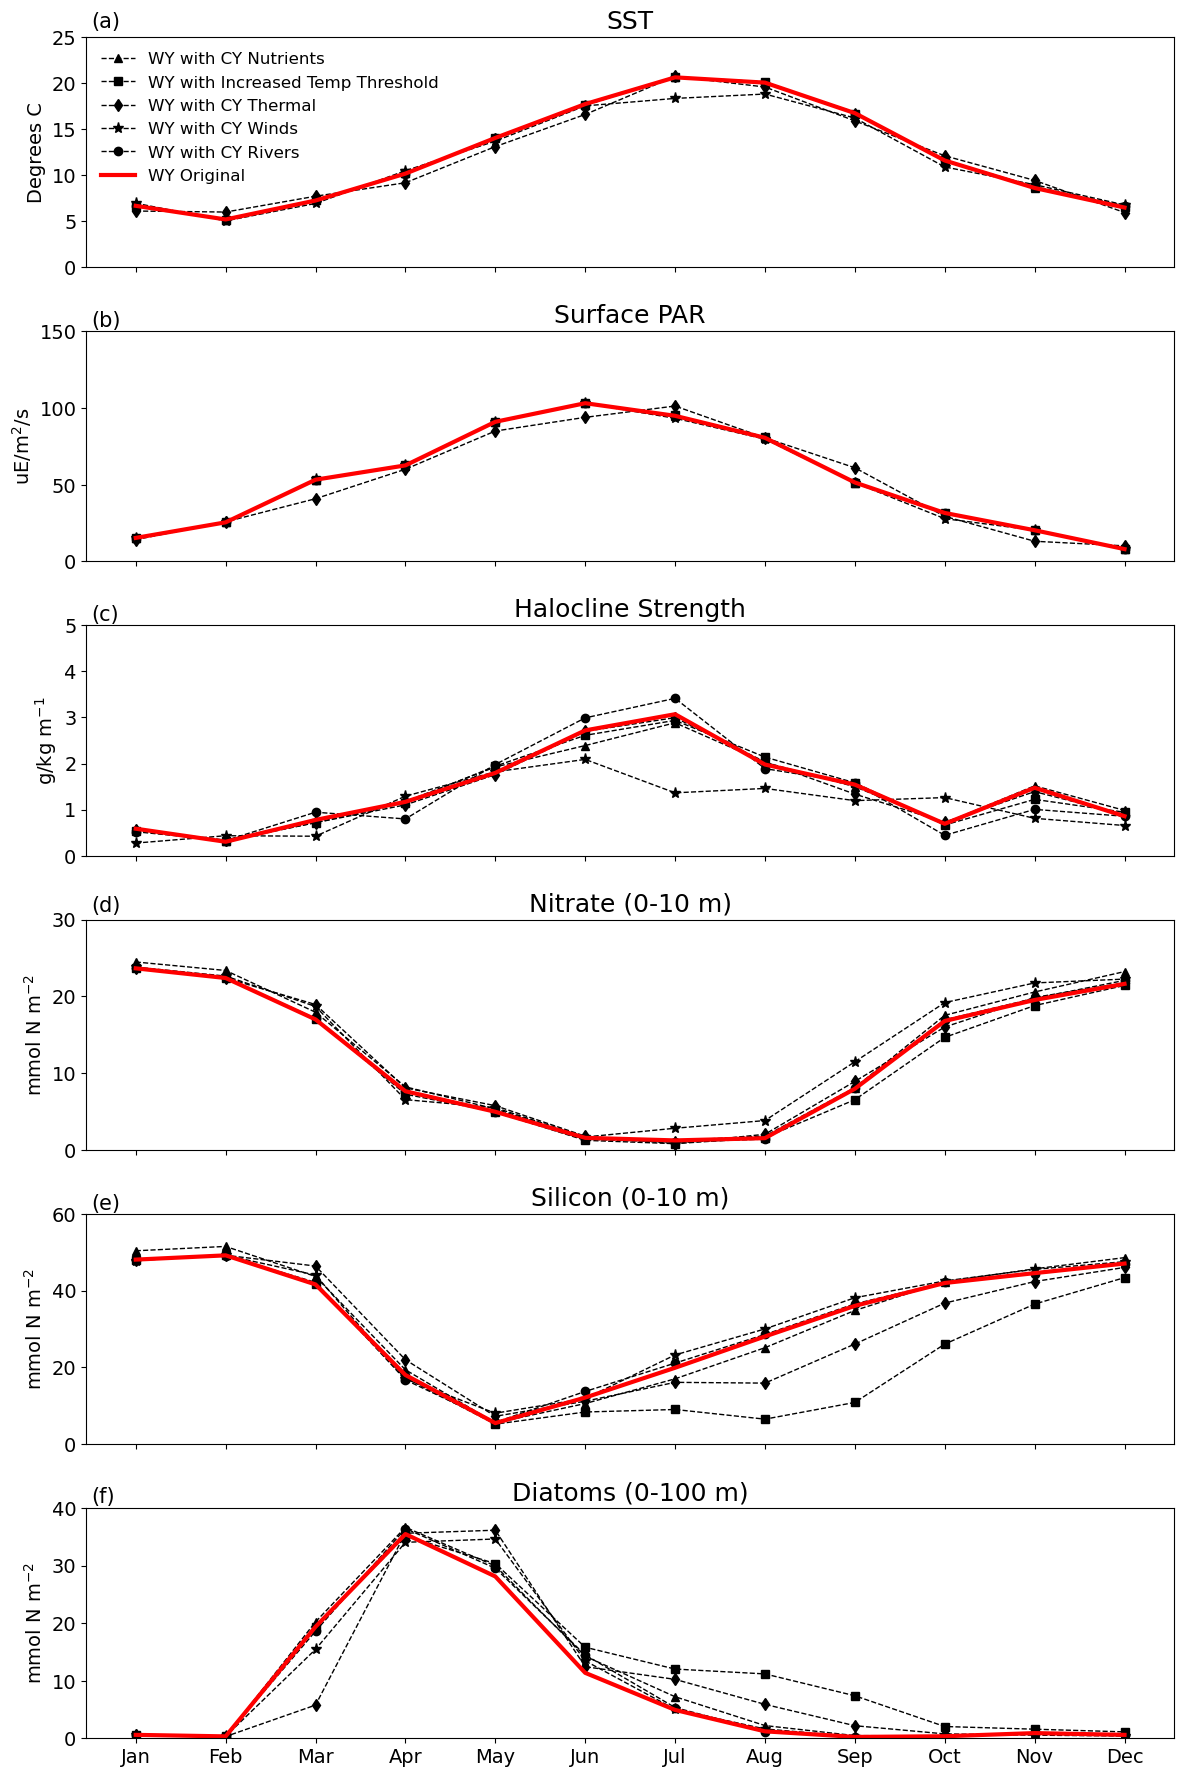

In [64]:
fig,ax=plt.subplots(6,1,figsize=(12,18))

fig.tight_layout(pad=2.5)

months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax[0].plot(xticks,WY_SST_Nuts,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[0].plot(xticks,WY_SST_Thresh,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[0].plot(xticks,WY_SST_Thermal,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[0].plot(xticks,WY_SST_Winds,'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[0].plot(xticks,WY_SST_Rivers,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax[0].plot(xticks,WY_SST_Orig,'-',color='r',linewidth=3,label='WY Original')

ax[0].legend(frameon=False,loc=2,fontsize=12)
ax[0].set_ylabel('Degrees C',fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylim(0,25)
ax[0].set_title('SST',fontsize=18)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].set_xticklabels([])
ax[0].text(-.5, 26, '(a)', fontsize=15,  color='k')


ax[1].plot(xticks,WY_PAR_Nuts,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[1].plot(xticks,WY_PAR_Thresh,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[1].plot(xticks,WY_PAR_Thermal,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[1].plot(xticks,WY_PAR_Winds,'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[1].plot(xticks,WY_PAR_Rivers,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax[1].plot(xticks,WY_PAR_Orig,'-',color='r',linewidth=3,label='WY Original')

ax[1].legend((),frameon=False)
ax[1].set_ylabel('uE/m$^{2}$/s',fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylim(0,150)
ax[1].set_title('Surface PAR',fontsize=18)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_xticklabels([])
ax[1].text(-.5, 153, '(b)', fontsize=15,  color='k')


ax[2].plot(xticks,WY_Halo_Nuts,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[2].plot(xticks,WY_Halo_Thresh,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[2].plot(xticks,WY_Halo_Thermal,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[2].plot(xticks,WY_Halo_Winds,'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[2].plot(xticks,WY_Halo_Rivers,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax[2].plot(xticks,WY_Halo_Orig,'-',color='r',linewidth=3,label='WY Original')

ax[2].legend((),frameon=False)
ax[2].set_ylabel('g/kg m$^{-1}$',fontsize=14)
ax[2].set_xlabel('')
ax[2].set_ylim(0,5)
ax[2].set_title('Halocline Strength',fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=14)
ax[2].yaxis.set_tick_params(labelsize=14)
ax[2].set_xticklabels([])
ax[2].text(-.5, 5.1, '(c)', fontsize=15,  color='k')


ax[3].plot(xticks,WY_Nuts_N,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[3].plot(xticks,WY_Thresh_N,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[3].plot(xticks,WY_Thermal_N,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[3].plot(xticks,WY_Winds_N,'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[3].plot(xticks,WY_Rivers_N,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax[3].plot(xticks,WY_Orig_N,'-',color='r',linewidth=3,label='WY Original')

ax[3].legend((),frameon=False)
ax[3].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[3].set_xlabel('')
ax[3].set_ylim(0,30)
ax[3].set_title('Nitrate (0-10 m)',fontsize=18)
ax[3].xaxis.set_tick_params(labelsize=14)
ax[3].yaxis.set_tick_params(labelsize=14)
ax[3].set_xticklabels([])
ax[3].text(-.5, 31, '(d)', fontsize=15,  color='k')


ax[4].plot(xticks,WY_Nuts_Si,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[4].plot(xticks,WY_Thresh_Si,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[4].plot(xticks,WY_Thermal_Si,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[4].plot(xticks,WY_Winds_Si,'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[4].plot(xticks,WY_Rivers_Si,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax[4].plot(xticks,WY_Orig_Si,'-',color='r',linewidth=3,label='WY Original')

ax[4].legend((),frameon=False)
ax[4].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[4].set_xlabel('')
ax[4].set_ylim(0,60)
ax[4].set_title('Silicon (0-10 m)',fontsize=18)
ax[4].xaxis.set_tick_params(labelsize=14)
ax[4].yaxis.set_tick_params(labelsize=14)
ax[4].set_xticklabels([])
ax[4].text(-.5, 61, '(e)', fontsize=15,  color='k')


ax[5].plot(xticks,WY_Diat_Nuts,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[5].plot(xticks,WY_Diat_Thresh,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[5].plot(xticks,WY_Diat_Thermal,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[5].plot(xticks,WY_Diat_Winds,'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[5].plot(xticks,WY_Diat_Rivers,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax[5].plot(xticks,WY_Diat_Orig,'-',color='r',linewidth=3,label='WY Original')

ax[5].legend((),frameon=False)
ax[5].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[5].set_xlabel('')
ax[5].set_ylim(0,40)
ax[5].set_title('Diatoms (0-100 m)',fontsize=18)
ax[5].xaxis.set_tick_params(labelsize=14)
ax[5].yaxis.set_tick_params(labelsize=14)
ax[5].text(-.5, 41, '(f)', fontsize=15,  color='k')

#ax[5].set_xticklabels([])

#fig.suptitle('Warm Year Experiments')


Text(-0.5, 17, '(f)')

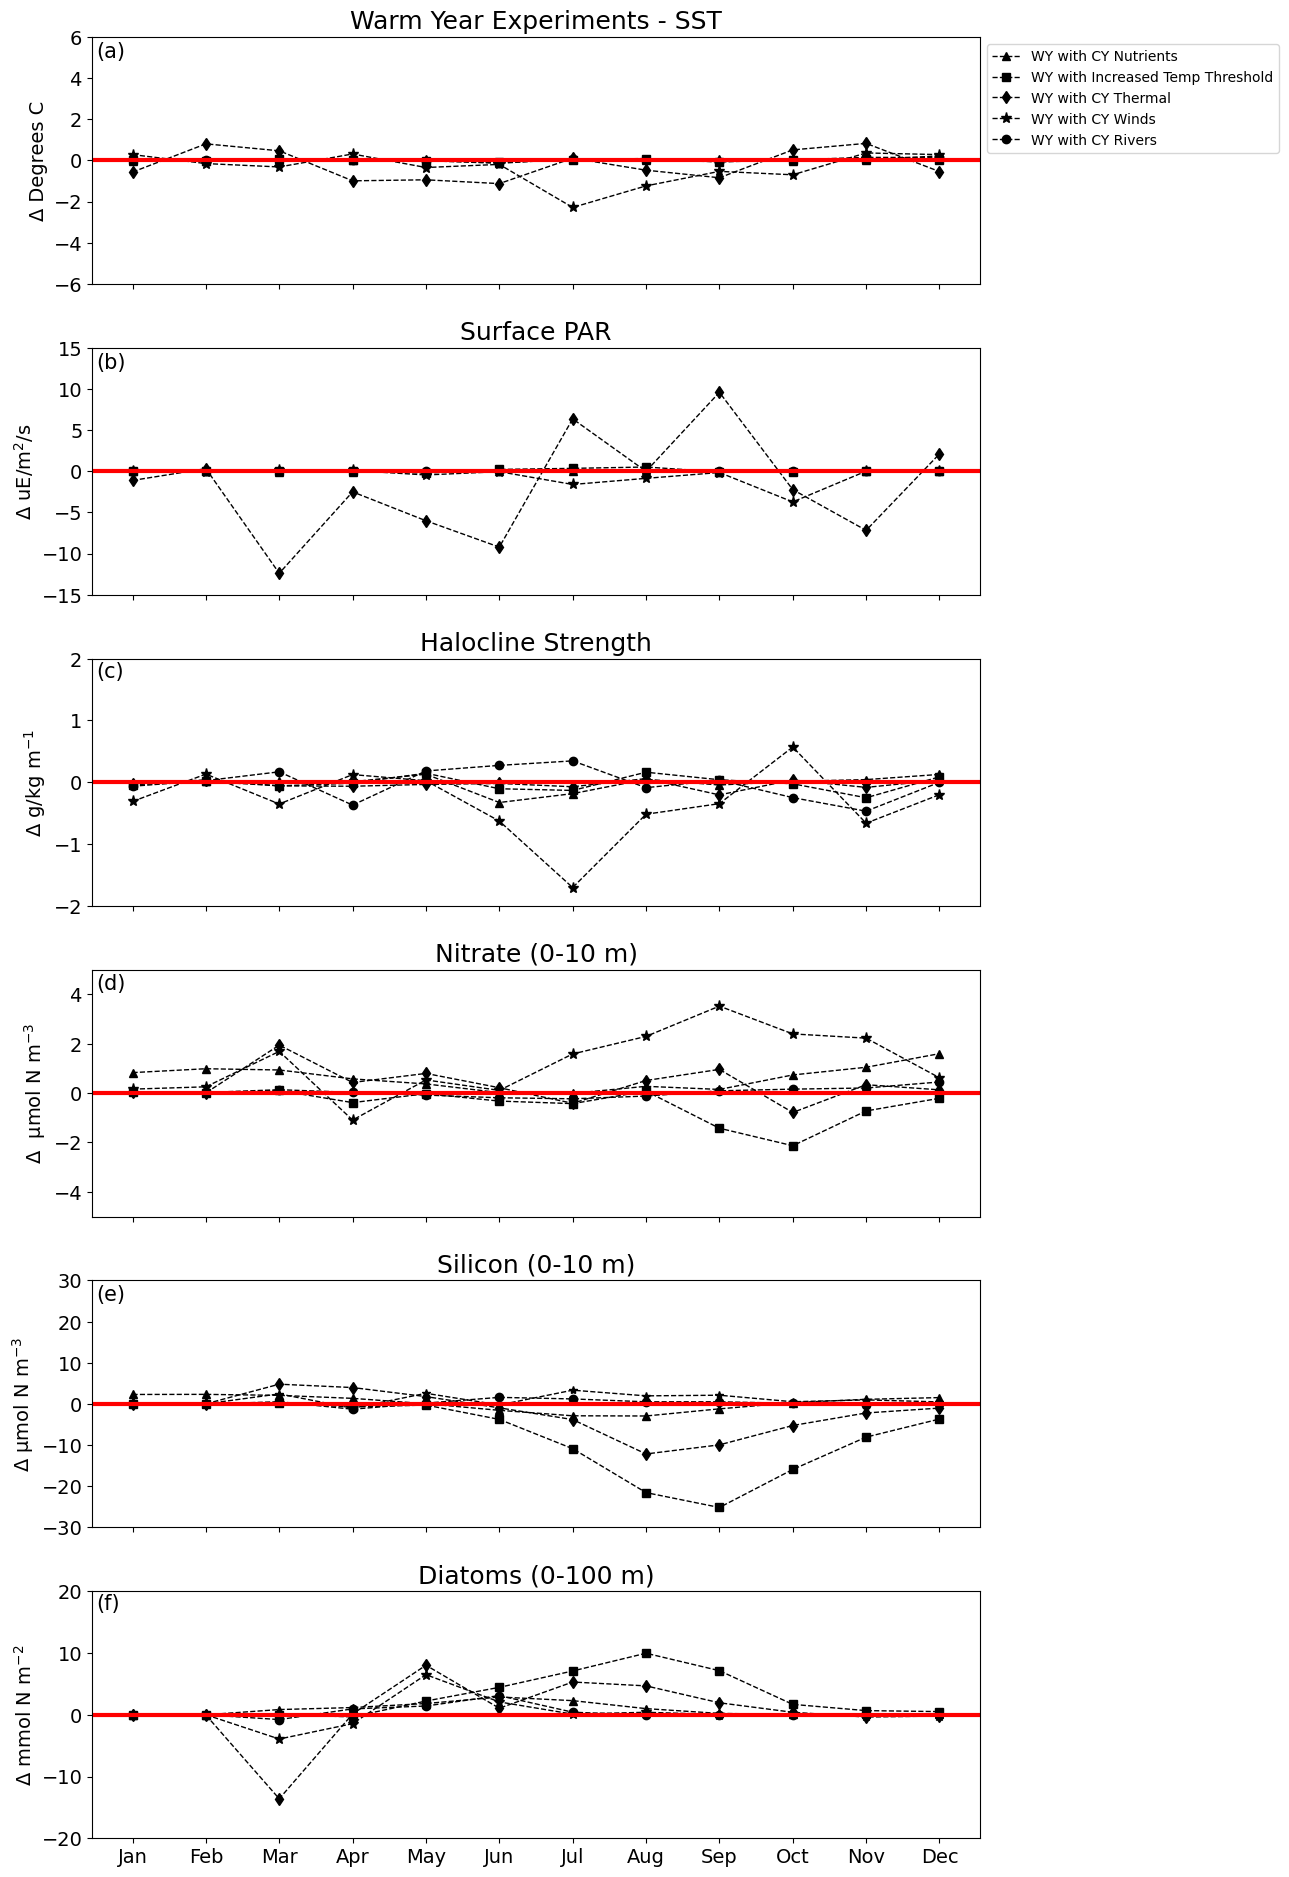

In [89]:
fig,ax=plt.subplots(6,1,figsize=(10,19))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


fig.tight_layout(pad=2.5)

ax[0].plot(xticks,np.subtract(WY_SST_Nuts,WY_SST_Orig),'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[0].plot(xticks,np.subtract(WY_SST_Thresh,WY_SST_Orig),'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[0].plot(xticks,np.subtract(WY_SST_Thermal,WY_SST_Orig),'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[0].plot(xticks,np.subtract(WY_SST_Winds,WY_SST_Orig),'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[0].plot(xticks,np.subtract(WY_SST_Rivers,WY_SST_Orig),'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
#ax.plot(xticks,WY_Orig,'-',color='r',linewidth=3,label='WY Original')

ax[0].legend(frameon=True,bbox_to_anchor=(1, 1))
ax[0].set_ylabel('\u0394 Degrees C',fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylim(-6,6)
ax[0].axhline(y=0,linewidth=3,color='r')
ax[0].set_title('Warm Year Experiments - SST',fontsize=18)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].set_xticklabels([])
ax[0].text(-.5, 5, '(a)', fontsize=15,  color='k')


ax[1].plot(xticks,np.subtract(WY_PAR_Nuts,WY_PAR_Orig),'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[1].plot(xticks,np.subtract(WY_PAR_Thresh,WY_PAR_Orig),'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[1].plot(xticks,np.subtract(WY_PAR_Thermal,WY_PAR_Orig),'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[1].plot(xticks,np.subtract(WY_PAR_Winds,WY_PAR_Orig),'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[1].plot(xticks,np.subtract(WY_PAR_Rivers,WY_PAR_Orig),'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
#ax.plot(xticks,WY_Orig,'-',color='r',linewidth=3,label='WY Original')

ax[1].legend((),frameon=False)
ax[1].set_ylabel('\u0394 uE/m$^{2}$/s',fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylim(-15,15)
ax[1].axhline(y=0,linewidth=3,color='r')
ax[1].set_title('Surface PAR',fontsize=18)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_xticklabels([])
ax[1].text(-.5, 12.5, '(b)', fontsize=15,  color='k')




ax[2].plot(xticks,np.subtract(WY_Halo_Nuts,WY_Halo_Orig),'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[2].plot(xticks,np.subtract(WY_Halo_Thresh,WY_Halo_Orig),'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[2].plot(xticks,np.subtract(WY_Halo_Thermal,WY_Halo_Orig),'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[2].plot(xticks,np.subtract(WY_Halo_Winds,WY_Halo_Orig),'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[2].plot(xticks,np.subtract(WY_Halo_Rivers,WY_Halo_Orig),'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
#ax.plot(xticks,WY_Orig,'-',color='r',linewidth=3,label='WY Original')

ax[2].legend((),frameon=False)
ax[2].set_ylabel('\u0394 g/kg m$^{-1}$',fontsize=14)
ax[2].set_xlabel('')
ax[2].set_ylim(-2,2)
ax[2].axhline(y=0,linewidth=3,color='r')
ax[2].set_title('Halocline Strength',fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=14)
ax[2].yaxis.set_tick_params(labelsize=14)
ax[2].set_xticklabels([])
ax[2].text(-.5, 1.7, '(c)', fontsize=15,  color='k')



ax[3].plot(xticks,np.subtract(WY_Nuts_N,WY_Orig_N),'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[3].plot(xticks,np.subtract(WY_Thresh_N,WY_Orig_N),'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[3].plot(xticks,np.subtract(WY_Thermal_N,WY_Orig_N),'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[3].plot(xticks,np.subtract(WY_Winds_N,WY_Orig_N),'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[3].plot(xticks,np.subtract(WY_Rivers_N,WY_Orig_N),'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
#ax.plot(xticks,WY_Orig_N,'-',color='r',linewidth=3,label='WY Original')

ax[3].legend((),frameon=False)
ax[3].set_ylabel('\u0394  \u03BCmol N m$^{-3}$',fontsize=14)
ax[3].set_xlabel('')
ax[3].set_ylim(-5,5)
ax[3].axhline(y=0,linewidth=3,color='r')
ax[3].set_title('Nitrate (0-10 m)',fontsize=18)
ax[3].xaxis.set_tick_params(labelsize=14)
ax[3].yaxis.set_tick_params(labelsize=14)
ax[3].set_xticklabels([])
ax[3].text(-.5, 4.2, '(d)', fontsize=15,  color='k')

ax[4].plot(xticks,np.subtract(WY_Nuts_Si,WY_Orig_Si),'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[4].plot(xticks,np.subtract(WY_Thresh_Si,WY_Orig_Si),'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[4].plot(xticks,np.subtract(WY_Thermal_Si,WY_Orig_Si),'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[4].plot(xticks,np.subtract(WY_Winds_Si,WY_Orig_Si),'--',marker='*',linewidth=1,color='k',label='WY with CY Winds')
ax[4].plot(xticks,np.subtract(WY_Rivers_Si,WY_Orig_Si),'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
#ax.plot(xticks,WY_Orig_Si,'-',color='r',linewidth=3,label='WY Original')

ax[4].legend((),frameon=False)
ax[4].set_ylabel('\u0394 \u03BCmol N m$^{-3}$',fontsize=14)
ax[4].set_xlabel('')
ax[4].set_ylim(-30,30)
ax[4].axhline(y=0,linewidth=3,color='r')
ax[4].set_title('Silicon (0-10 m)',fontsize=18)
ax[4].xaxis.set_tick_params(labelsize=14)
ax[4].yaxis.set_tick_params(labelsize=14)
ax[4].set_xticklabels([])
ax[4].text(-.5, 25, '(e)', fontsize=15,  color='k')

ax[5].plot(xticks,np.subtract(WY_Diat_Nuts,WY_Diat_Orig),'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax[5].plot(xticks,np.subtract(WY_Diat_Thresh,WY_Diat_Orig),'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[5].plot(xticks,np.subtract(WY_Diat_Thermal,WY_Diat_Orig),'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax[5].plot(xticks,np.subtract(WY_Diat_Winds,WY_Diat_Orig),'--',marker='*',markersize=8,linewidth=1,color='k',label='WY with CY Winds')
ax[5].plot(xticks,np.subtract(WY_Diat_Rivers,WY_Diat_Orig),'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
#ax.plot(xticks,WY_Orig,'-',color='r',linewidth=3,label='WY Original')

ax[5].legend((),frameon=False)
ax[5].set_ylabel('\u0394 mmol N m$^{-2}$',fontsize=14)
ax[5].set_xlabel('',fontsize=14)
ax[5].set_ylim(-20,20)
ax[5].axhline(y=0,linewidth=3,color='r')
ax[5].set_title('Diatoms (0-100 m)',fontsize=18)
ax[5].xaxis.set_tick_params(labelsize=14)
ax[5].yaxis.set_tick_params(labelsize=14)
#ax[5].set_xticklabels([])
ax[5].text(-.5, 17, '(f)', fontsize=15,  color='k')